<a href="https://colab.research.google.com/github/namitagaidhani/ngc346-exploration/blob/main/JWST_NGC_346_Color_Magnitude_Diagram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Extracting data and Plotting a Color Magnitude Diagram for a portion of NGC 346 (Small Magellanic Cloud)**

Cross referenced image data from the James Webb Space Telescope from two filters


*   F090W
*   F150W




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

!pip install photutils

from astropy.io import fits
from astropy.stats import sigma_clipped_stats
from photutils.detection import DAOStarFinder
from photutils.aperture import CircularAperture, aperture_photometry
from photutils.background import Background2D, MedianBackground
from google.colab import drive

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 25.4 MB/s eta 0:00:00


Finding the file path to the data (*only run this if the path is incorrect or the file is unable to be found)*

In [2]:
import os

drive.mount('/content/drive')

# find the folder containing FITS file downloaded from JWST Open Source Data
base_path = "/content/drive/My Drive/nama/astronomy_project"
for root, dirs, files in os.walk(base_path):
    for file in files:
        if "cal.fits" in file:
            print(os.path.join(root, file))

Mounted at /content/drive
/content/drive/My Drive/nama/astronomy_project/MAST_2025-04-17T1744_NGC346-F150W/JWST/jw03990287001_12201_00001_nrca1/jw03990287001_12201_00001_nrca1_uncal.fits
/content/drive/My Drive/nama/astronomy_project/MAST_2025-04-17T1744_NGC346-F150W/JWST/jw03990287001_12201_00001_nrca1/jw03990287001_12201_00001_nrca1_cal.fits
/content/drive/My Drive/nama/astronomy_project/MAST_2025-04-17T1747_NGC346-F090W/JWST/jw03990285001_04201_00004_nrca1/jw03990285001_04201_00004_nrca1_uncal.fits
/content/drive/My Drive/nama/astronomy_project/MAST_2025-04-17T1747_NGC346-F090W/JWST/jw03990285001_04201_00004_nrca1/jw03990285001_04201_00004_nrca1_cal.fits


**Import the data**

Opening up the Calibrated Image file for F150W and F090W for NGC 346 in the respective cells below.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Filename: /content/drive/My Drive/nama/astronomy_project/MAST_2025-04-17T1744_NGC346-F150W/JWST/jw03990287001_12201_00001_nrca1/jw03990287001_12201_00001_nrca1_cal.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     330   ()      
  1  SCI           1 ImageHDU       132   (2048, 2048)   float32   
  2  ERR           1 ImageHDU        10   (2048, 2048)   float32   
  3  DQ            1 ImageHDU        11   (2048, 2048)   int32 (rescales to uint32)   
  4  AREA          1 ImageHDU         9   (2048, 2048)   float32   
  5  VAR_POISSON    1 ImageHDU         9   (2048, 2048)   float32   
  6  VAR_RNOISE    1 ImageHDU         9   (2048, 2048)   float32   
  7  VAR_FLAT      1 ImageHDU         9   (2048, 2048)   float32   
  8  ASDF          1 BinTableHDU     11   1R x 1C   [25650B]   
F150W
SIMPLE  =              

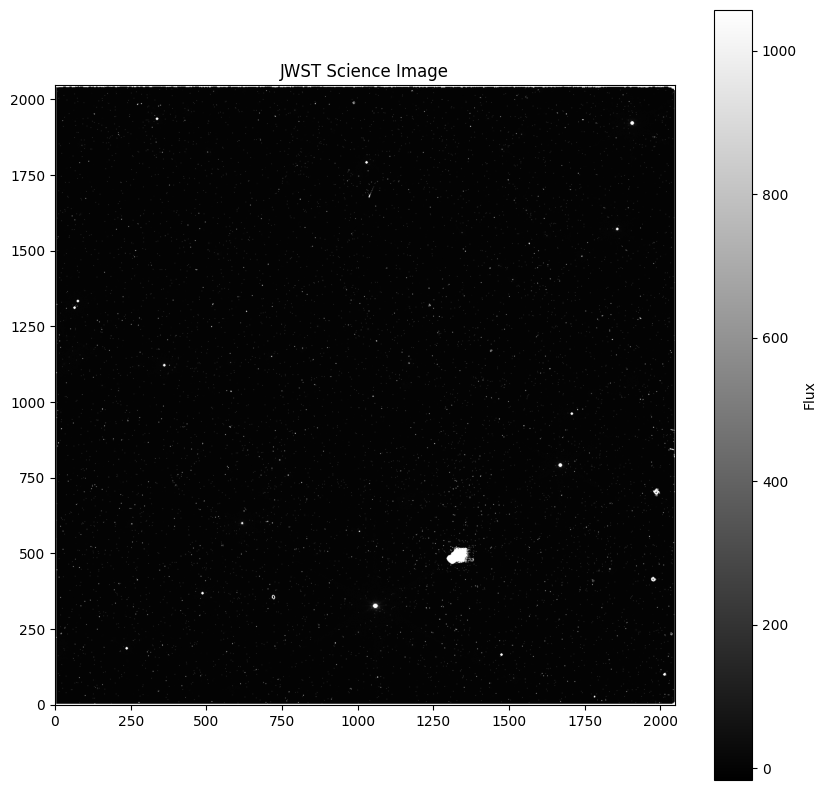

In [3]:
drive.mount('/content/drive')

fits_file_path = "/content/drive/My Drive/nama/astronomy_project/MAST_2025-04-17T1744_NGC346-F150W/JWST/jw03990287001_12201_00001_nrca1/jw03990287001_12201_00001_nrca1_cal.fits"

hdul = fits.open(fits_file_path)

hdul.info()

# F150W
print(hdul[0].header['FILTER'])
print(hdul[0].header)

# extract image data, get image array
spectral_data_150W = hdul[1].data

plt.figure(figsize=(10, 10))
plt.imshow(spectral_data_150W, cmap='gray', origin='lower')
plt.colorbar(label='Flux')
plt.title('JWST Science Image')
plt.show()

Filename: /content/drive/My Drive/nama/astronomy_project/MAST_2025-04-17T1747_NGC346-F090W/JWST/jw03990285001_04201_00004_nrca1/jw03990285001_04201_00004_nrca1_cal.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     330   ()      
  1  SCI           1 ImageHDU       156   (2048, 2048)   float32   
  2  ERR           1 ImageHDU        10   (2048, 2048)   float32   
  3  DQ            1 ImageHDU        11   (2048, 2048)   int32 (rescales to uint32)   
  4  AREA          1 ImageHDU         9   (2048, 2048)   float32   
  5  VAR_POISSON    1 ImageHDU         9   (2048, 2048)   float32   
  6  VAR_RNOISE    1 ImageHDU         9   (2048, 2048)   float32   
  7  VAR_FLAT      1 ImageHDU         9   (2048, 2048)   float32   
  8  ASDF          1 BinTableHDU     11   1R x 1C   [26444B]   
F090W
SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                    8 / array data type                        

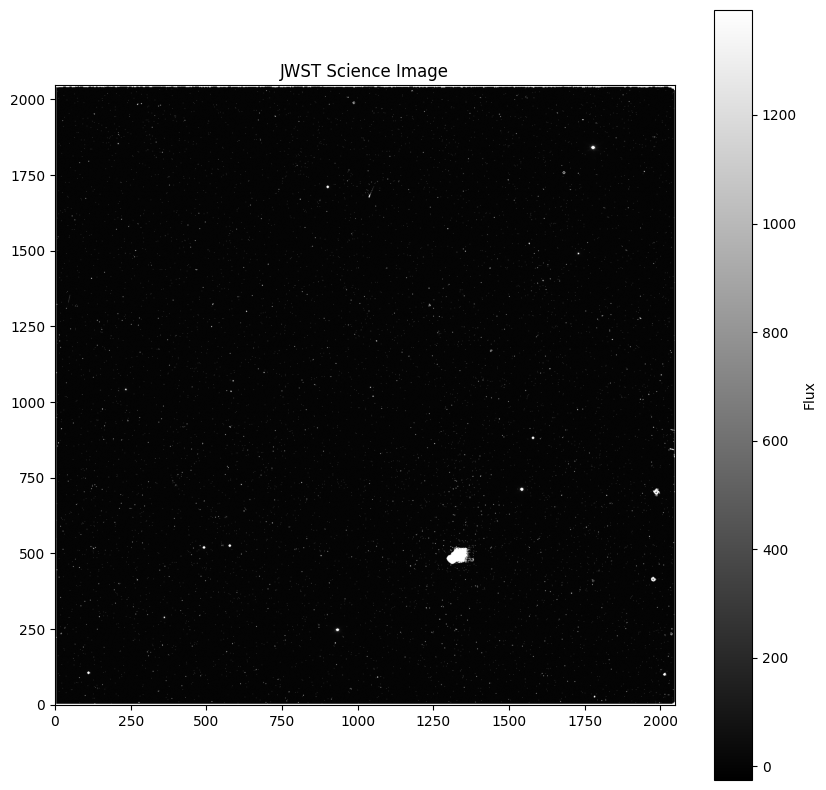

In [4]:
fits_file_path = "/content/drive/My Drive/nama/astronomy_project/MAST_2025-04-17T1747_NGC346-F090W/JWST/jw03990285001_04201_00004_nrca1/jw03990285001_04201_00004_nrca1_cal.fits"

hdul = fits.open(fits_file_path)

hdul.info()

# F0900W
print(hdul[0].header['FILTER'])
print(hdul[0].header)


spectral_data_090W = hdul[1].data

plt.figure(figsize=(10, 10))
plt.imshow(spectral_data_090W, cmap='gray', origin='lower')
plt.colorbar(label='Flux')
plt.title('JWST Science Image')
plt.show()

In [5]:
from astropy.stats import sigma_clipped_stats, SigmaClip
from photutils.detection import DAOStarFinder
from photutils.aperture import CircularAperture, aperture_photometry
from photutils.background import Background2D, MedianBackground

# detect stars in F090W
mean, median, std = sigma_clipped_stats(spectral_data_090W, sigma=3.0)

daofind = DAOStarFinder(fwhm=3.0, threshold=5.*std)
sources_090W = daofind(spectral_data_090W - median)

# detect stars in F150W
mean, median, std = sigma_clipped_stats(spectral_data_150W, sigma=3.0)

daofind = DAOStarFinder(fwhm=3.0, threshold=5.*std)
sources_f150 = daofind(spectral_data_150W - median)

**Cross match the stars** based on proximity of x, y in both filters



In [8]:
from scipy.spatial import cKDTree
import numpy as np

positions_150 = np.transpose((sources_f150['xcentroid'], sources_f150['ycentroid']))
positions_090 = np.transpose((sources_090W['xcentroid'], sources_090W['ycentroid']))

# create KDTree from F090W positions
tree = cKDTree(positions_090)

# query the nearest neighbors in F090W for each source in F150W and filter out matches with no neighbors within the threshhold
distances, indices = tree.query(positions_150, distance_upper_bound=2.0)
valid = distances != np.inf

matched_150 = sources_f150[valid]
matched_090 = sources_090W[indices[valid]]

flux_150 = matched_150['flux']
flux_090 = matched_090['flux']

# pogson formula for magnitude with zero-point flux
mag_150 = -2.5 * np.log10(flux_150)
mag_090 = -2.5 * np.log10(flux_090)


color = mag_090 - mag_150

**Plot Color-Magnitude Diagram**  

Calculated color index against the F150W Magnitude

* F150W is more red, making it less sensitive to astronomical extinction -
scattering and absorption of light due to interstellar dust and atmosphere


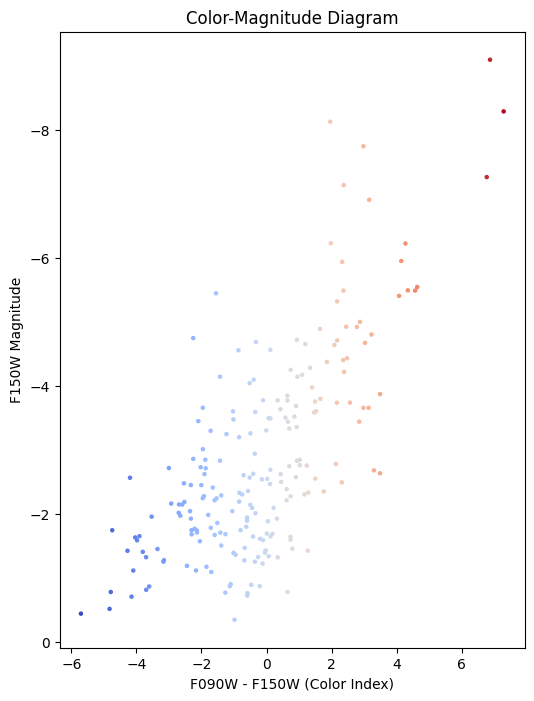

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 8))
plt.scatter(color, mag_150, s=5, c= color, cmap = 'coolwarm')
plt.gca().invert_yaxis()
plt.xlabel('F090W - F150W (Color Index)')
plt.ylabel('F150W Magnitude')
plt.title('Color-Magnitude Diagram')
plt.show()